In [1]:
import torch
import torchvision
from torch import nn,tensor
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
from IPython.display import display, clear_output
from tqdm import tqdm_notebook as tqdm

# Data

In [2]:
train_set = torchvision.datasets.MNIST('../data',transform=transforms.Compose([
    transforms.ToTensor()
]))
val_set = torchvision.datasets.MNIST('../data',train=False,transform=transforms.Compose([
    transforms.ToTensor()
]))
val_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test

In [3]:
# create Data loader
train_dl = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True,num_workers=12)
val_dl = torch.utils.data.DataLoader(val_set,batch_size=32,shuffle=True,num_workers=12)

tensor([8, 5, 3, 2, 2, 5, 4, 4, 0, 1, 6, 0, 7, 9, 6, 4, 1, 0, 0, 6, 1, 9, 6, 1,
        5, 8, 1, 6, 5, 0, 3, 8])


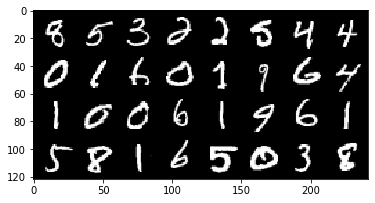

In [4]:
x = next(iter(train_dl))
grid = torchvision.utils.make_grid(x[0])
plt.imshow(np.transpose(grid,(1,2,0)))
print(x[1])

# Architecture/Model

In [5]:
len(train_set.classes)

10

In [6]:
x[0][0].numel()

784

In [7]:
model = nn.Linear(x[0][0].numel(),len(train_set.classes))
model

Linear(in_features=784, out_features=10, bias=True)

# Loss function

In [8]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

# optimizer

In [9]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

# start training

In [35]:
def one_epoch_train(train_dl,model):
    results = OrderedDict()
#     model.cuda()
    running_loss = 0
    for img,y in tqdm(train_dl):
#         img,y = img.cuda(),y.cuda()
        optimizer.zero_grad()
        y_hat = model(img.view(32,-1))
        loss = loss_func(y_hat,y)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
#     print('train accuracy:',(y_hat.argmax(1)==y).float().mean())
    with torch.no_grad():
        correct = 0
        loss = 0
        for img,y in val_dl:
            y_hat = model(img.view(img.size(0),-1))
            loss += loss_func(y_hat,y)
            correct += (y_hat.argmax(1)==y).float().sum()
#         print('running loss',loss.item())
#         print('valid accuracy',correct.item()/len(val_set))  
    results['loss'] = running_loss / len(train_dl)
    results["valid_loss"] = loss.item() / len(val_dl)
    results['accuracy'] = (y_hat.argmax(1)==y).float().mean().item()
    results["valid_acc"] = correct.item()/len(val_set)
    run_data.append(results)
    df = pd.DataFrame.from_dict(run_data)
    clear_output(wait=True)
    display(df)
    

In [30]:
def valid(model,val_dl):
    with torch.no_grad():
        correct = 0
        loss = 0
        for img,y in val_dl:
            y_hat = model(img.view(img.size(0),-1))
            loss += loss_func(y_hat,y)
            correct += (y_hat.argmax(1)==y).float().sum()
        print('running loss',loss.item())
        print('valid accuracy',correct.item()/len(val_set))    

In [36]:
run_data = []
for i in range(5):
    one_epoch_train(train_dl,model)
#     valid(model,val_dl)

,loss,valid_loss,accuracy,valid_acc
0,0.242065,0.272141,0.8750,0.9260
1,0.241463,0.269373,1.0000,0.9276
2,0.240435,0.266185,0.9375,0.9284
3,0.240108,0.265150,0.9375,0.9272
4,0.238978,0.272174,1.0000,0.9260


In [2]:
d = nn.Dropout()

In [12]:
inp = tensor([1.,2.,3.,4.,5.,6.])
d(inp)

tensor([0., 0., 6., 8., 0., 0.])